<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 2: Análisis Univariado, bivariado y multivariado</strong></span>
---
<p align="right">
  <a href="https://colab.research.google.com/#create=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [62]:
nombre = 'Alejandro Orrego Roldan'
correo = 'alejandro.orregor@udea.edu.co'
cedula = 585502
print(f"Nombre: {nombre}\nCorreo: {correo}\nCédula: {cedula}")

Nombre: Alejandro Orrego Roldan
Correo: alejandro.orregor@udea.edu.co
Cédula: 585502


## <span style="color:black;"><strong>Parte 1: Análisis Univariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 1: Cálculo de medidas de tendencia central</strong></span>

A partir de una muestra simulada de ingresos, calcula la **media, mediana y moda**, y luego a interpretarlas.

1. Usa el número base `528310` (debes reemplazarlo con los últimos 6 dígitos de tu documento de identificación).  
2. Con este número genera una semilla (`np.random.seed`) para que los resultados sean reproducibles.  
3. Los ingresos se simulan con una distribución normal:  
   - Media teórica: `(base % 10) + 2`  
   - Desviación estándar: `2`  
   - Tamaño de muestra: `30`  
4. Los valores negativos se reemplazan por cero (pues los ingresos no pueden ser negativos).  
5. Grafica tus resultados (ver imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e1.png" alt="sp_2_e1" width="900"  height="400">
</p>


Media:   4.40
Mediana: 4.00
Moda:    4.00


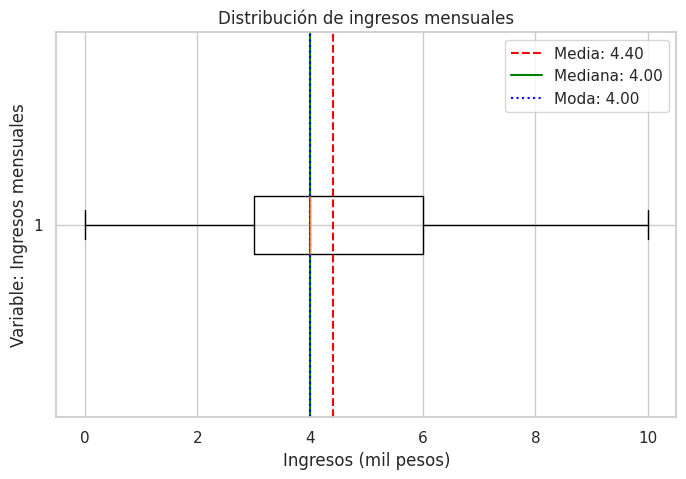

In [63]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

plt.rcParams.update({'figure.figsize': (8,5)})

cedula = 585502
np.random.seed(cedula)

data = np.random.normal(loc=(cedula % 10) + 2, scale=2, size=100).round(0)

media = np.mean(data)
mediana = np.median(data)
moda = stats.mode(data, keepdims=True)[0][0]

print(f"Media:   {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda:    {moda:.2f}")

#quitar negativos
data= np.clip(data, a_min=0, a_max=None)

# Visualización
plt.boxplot(data, vert=False)
plt.title("Distribución de ingresos mensuales")
plt.xlabel("Ingresos (mil pesos)")
plt.ylabel("Variable: Ingresos mensuales")
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='blue', linestyle=':', label=f'Moda: {moda:.2f}')
plt.legend()
plt.show()

In [64]:
data

array([ 6.,  6.,  5.,  4.,  6.,  2.,  3.,  3.,  3.,  4.,  8.,  4.,  2.,
        6.,  4.,  7.,  4.,  4.,  3.,  5.,  5.,  5.,  4.,  8.,  4.,  7.,
        7.,  4.,  6.,  6.,  6.,  6.,  2.,  5.,  2.,  8.,  4.,  4.,  2.,
        4.,  1.,  4.,  8.,  5.,  3.,  1.,  5.,  4.,  5.,  4.,  7.,  5.,
        8.,  4.,  3.,  4.,  5.,  4.,  2.,  4.,  6.,  6.,  7.,  4.,  0.,
        2., 10.,  2.,  4.,  3.,  5.,  5.,  2.,  4.,  5.,  0.,  8.,  4.,
        4.,  4.,  2.,  5.,  1.,  4.,  5.,  2.,  6.,  4.,  1.,  4.,  5.,
        5.,  5.,  6.,  4.,  3.,  7.,  6.,  2.,  4.])

### <span style="color:#2F749F;"><strong>Ejercicio 2: Cálculo de medidas de dispersión</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza qué tan dispersos están los datos respecto a su media. Calcula:
1. Rango
2. Varianza
3. Desviación estándar
4. Coeficiente de variación
5. Genera una gráfica con los resultados obtenidos (ver imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e2.png" alt="sp_2_e2" width="900"  height="400">
</p>

Medidas de dispersión:
  Mínimo = 0.0
  Máximo = 10.0
  Rango = 10.0
  Varianza = 3.68
  Desviación estándar = 1.92
  Coef. de variación = 0.44


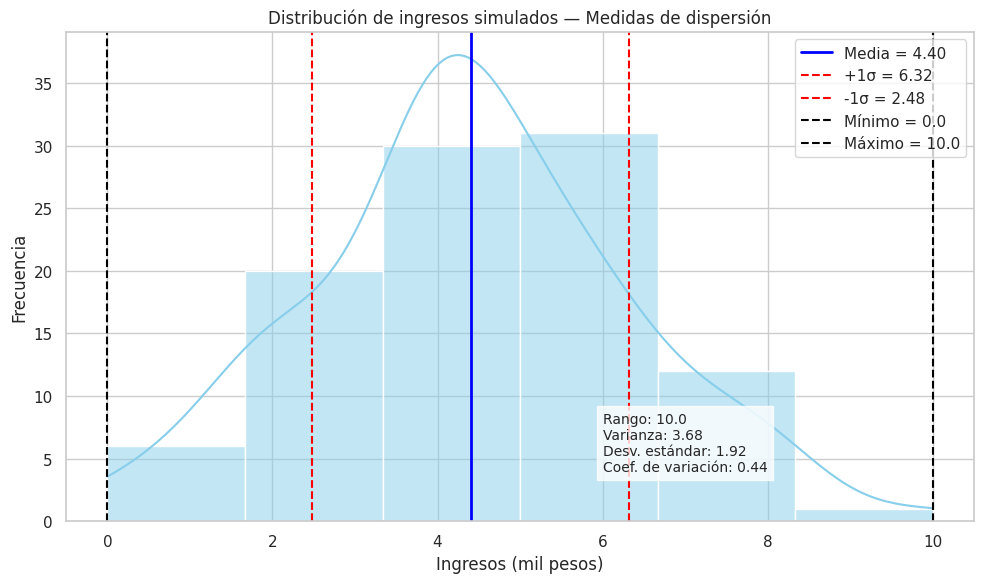

In [65]:
media = np.mean(data)
minimo = np.min(data)
maximo = np.max(data)
rango = maximo - minimo
varianza = np.var(data, ddof=1)     # varianza muestral
desviacion = np.std(data, ddof=1)   # desviación estándar muestral
coef_var = desviacion / media

print("Medidas de dispersión:")
print(f"  Mínimo = {minimo}")
print(f"  Máximo = {maximo}")
print(f"  Rango = {rango}")
print(f"  Varianza = {varianza:.2f}")
print(f"  Desviación estándar = {desviacion:.2f}")
print(f"  Coef. de variación = {coef_var:.2f}")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data, bins=6, kde=True, color='skyblue')

plt.axvline(media, color='blue', linestyle='-', linewidth=2, label=f'Media = {media:.2f}')
plt.axvline(media + desviacion, color='red', linestyle='--', linewidth=1.5, label=f'+1σ = {media+desviacion:.2f}')
plt.axvline(media - desviacion, color='red', linestyle='--', linewidth=1.5, label=f'-1σ = {media-desviacion:.2f}')
plt.axvline(minimo, color='black', linestyle='--', linewidth=1.5, label=f'Mínimo = {minimo}')
plt.axvline(maximo, color='black', linestyle='--', linewidth=1.5, label=f'Máximo = {maximo}')

# Text
texto = (
    f"Rango: {rango}\n"
    f"Varianza: {varianza:.2f}\n"
    f"Desv. estándar: {desviacion:.2f}\n"
    f"Coef. de variación: {coef_var:.2f}"
)
plt.text(maximo-4, 4, texto, bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

plt.title("Distribución de ingresos simulados — Medidas de dispersión")
plt.xlabel("Ingresos (mil pesos)")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()


### <span style="color:#2F749F;"><strong>Ejercicio 3: Cálculo de medidas de distribución</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza la distribución de los datos. Calcula:
1. Asimetría
2. Curtosis
3. Realiza la comparación con la distribución normal (ver la imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e3.png" alt="sp_2_e3" width="900"  height="400">
</p>



Medidas de distribución (muestra de ingresos simulados):
  Asimetría = 0.15
  Curtosis  = 0.07


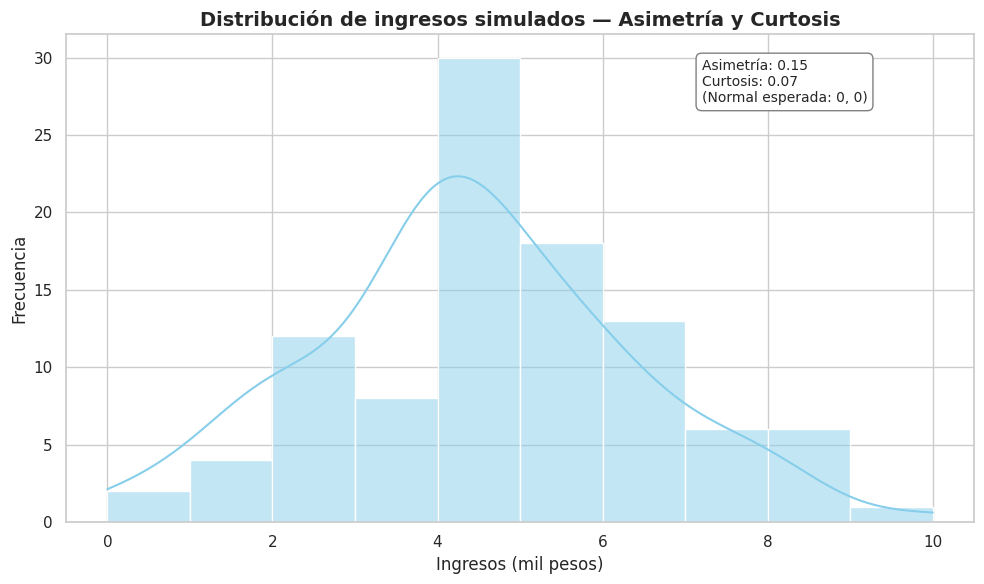

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

sns.set_theme(style="whitegrid")

asimetria = skew(data)
curtosis_valor = kurtosis(data, fisher=True)  # Fisher=True → curtosis centrada en 0

print("Medidas de distribución (muestra de ingresos simulados):")
print(f"  Asimetría = {asimetria:.2f}")
print(f"  Curtosis  = {curtosis_valor:.2f}")

fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(data, kde=True, color='skyblue', bins=10, ax=ax)

ax.set_title("Distribución de ingresos simulados — Asimetría y Curtosis", fontsize=14, fontweight='bold')
ax.set_xlabel("Ingresos (mil pesos)")
ax.set_ylabel("Frecuencia")

# Caja con resultados
texto = f"Asimetría: {asimetria:.2f}\nCurtosis: {curtosis_valor:.2f}\n(Normal esperada: 0, 0)"
ax.text(0.70, 0.95, texto,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="gray"))

plt.tight_layout()
plt.show()


La asimetría obtenida es 0.15, un valor muy cercano a 0, lo que indica que la distribución de los datos es prácticamente simétrica, sin sesgos fuertes hacia la izquierda o derecha.
La curtosis es 0.07, también muy cercana a 0, lo que significa que la forma de la distribución es similar a la normal, sin colas muy pesadas ni muy ligeras.
En conclusión, los ingresos simulados siguen una distribución bastante parecida a la normal.

### <span style="color:#2F749F;"><strong>Ejercicio 4: Cálculo de medidas de percentiles</strong></span>

A partir de la muestra generada en el Ejercicio 1, calcula los percentiles de tus datos. Calcula:
1. Percentiles
2. Deciles
3. Cuartiles
4. Grafica los anteriores percentiles calculados, sobre la distribución de tus datos (ver la imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e4.png" alt="sp_2_e4" width="900"  height="400">
</p>


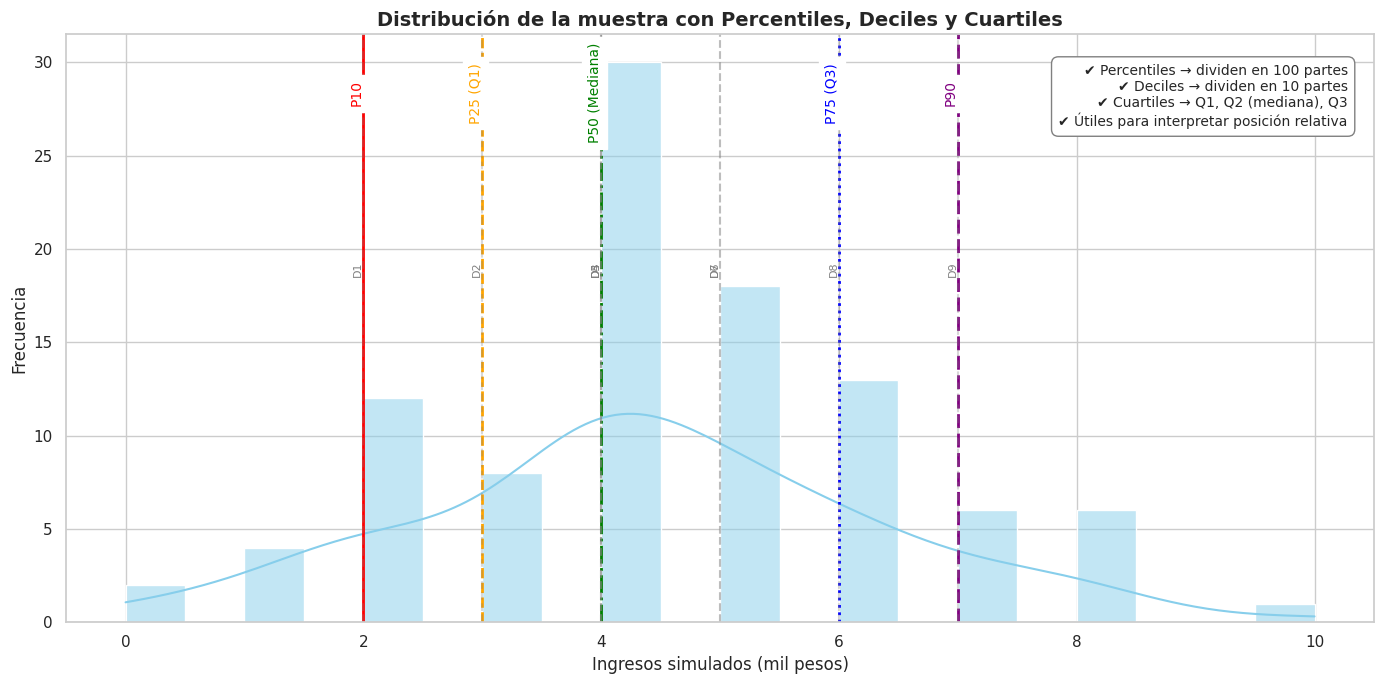

Percentiles:
P10: 2.00, P25 (Q1): 3.00, P50 (Mediana): 4.00, P75 (Q3): 6.00, P90: 7.00

Deciles (D1-D9):
D1: 2.00
D2: 3.00
D3: 4.00
D4: 4.00
D5: 4.00
D6: 5.00
D7: 5.00
D8: 6.00
D9: 7.00


In [67]:
# Calcular percentiles
p10 = np.percentile(data, 10)
p25 = np.percentile(data, 25)  # Q1
p50 = np.percentile(data, 50)  # Mediana
p75 = np.percentile(data, 75)  # Q3
p90 = np.percentile(data, 90)

# Calcular deciles (D1-D9)
deciles = {f"D{i}": np.percentile(data, i*10) for i in range(1, 10)}

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.histplot(data, kde=True, color='skyblue', bins=20)

# Percentiles con estilos
percentiles = {
    "P10": {"valor": p10, "color": "red", "linestyle": "-"},
    "P25 (Q1)": {"valor": p25, "color": "orange", "linestyle": "--"},
    "P50 (Mediana)": {"valor": p50, "color": "green", "linestyle": "-."},
    "P75 (Q3)": {"valor": p75, "color": "blue", "linestyle": ":"},
    "P90": {"valor": p90, "color": "purple", "linestyle": (0, (5, 2))}
}

# Agregar percentiles destacados
for etiqueta, props in percentiles.items():
    plt.axvline(props["valor"], color=props["color"], linestyle=props["linestyle"], linewidth=2)
    plt.text(props["valor"], plt.ylim()[1]*0.9, etiqueta,
             rotation=90, color=props["color"], fontsize=10,
             verticalalignment="center", horizontalalignment="right",
             backgroundcolor="white")

# Agregar deciles en gris más sutil
for etiqueta, valor in deciles.items():
    plt.axvline(valor, color="gray", linestyle="--", alpha=0.3)
    plt.text(valor, plt.ylim()[1]*0.6, etiqueta,
             rotation=90, color="gray", fontsize=8,
             verticalalignment="center", horizontalalignment="right")

texto = (
    "✔ Percentiles → dividen en 100 partes\n"
    "✔ Deciles → dividen en 10 partes\n"
    "✔ Cuartiles → Q1, Q2 (mediana), Q3\n"
    "✔ Útiles para interpretar posición relativa"
)
plt.text(0.98, 0.95, texto, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment="top", horizontalalignment="right",
         bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="gray"))

plt.title("Distribución de la muestra con Percentiles, Deciles y Cuartiles", fontsize=14, fontweight="bold")
plt.xlabel("Ingresos simulados (mil pesos)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Mostrar resultados
print("Percentiles:")
print(f"P10: {p10:.2f}, P25 (Q1): {p25:.2f}, P50 (Mediana): {p50:.2f}, P75 (Q3): {p75:.2f}, P90: {p90:.2f}")
print("\nDeciles (D1-D9):")
for d, v in deciles.items():
    print(f"{d}: {v:.2f}")


## <span style="color:black;"><strong>Parte 2: Análisis Bivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 5: Análisis de correlación</strong></span>

En esta segunda parte, genera **dos variables** a partir de tú número de cédula y realiza un análisis **bivariado** para calcular la relación entre ellas.

1. Use los **6 últimos dígitos** de su cédula como base (similar al Ejercicio 1).  
2. Genere dos variables aleatorias (ejemplo: `ingresos` y `gastos`) con distribución normal, usando esa base como **semilla reproducible**.  
3. Calcule los coeficientes de correlación de **Pearson** y **Spearman**.
4. Grafique las variables analizadas (ver la imagen de ejemplo)
5. Interprete los resultados.  

<p align="center">
    <img src="imgs\sp_2_e5.png" alt="sp_2_e5" width="900"  height="400">
</p>

Coeficiente de Pearson: 0.759
Coeficiente de Spearman: 0.730


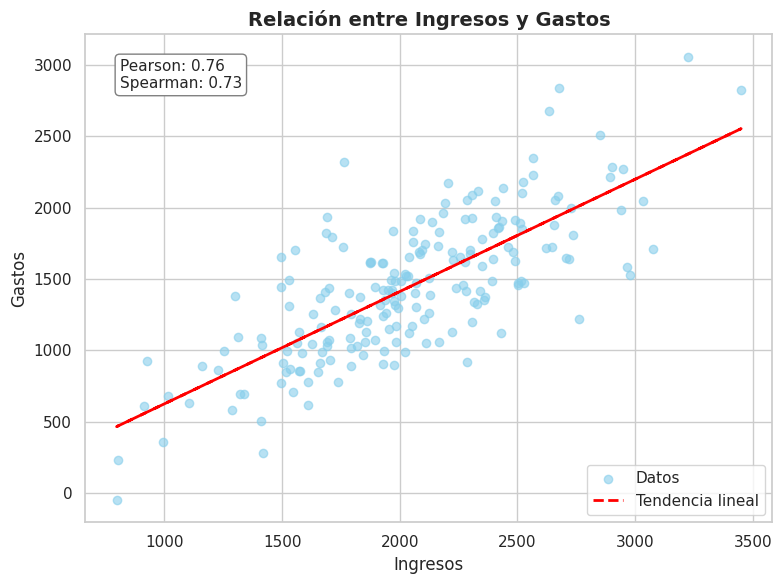

In [68]:
# Generar dos variables aleatorias
cedula = 585502
np.random.seed(cedula)

# Generar dos variables aleatorias
n = 200
ingresos = np.random.normal(loc=2000, scale=500, size=n)
gastos = ingresos * 0.7 + np.random.normal(0, 300, n)  # correlación positiva moderada


#Calcular correlaciones
pearson_corr, _ = stats.pearsonr(ingresos, gastos)
spearman_corr, _ = stats.spearmanr(ingresos, gastos)

print(f"Coeficiente de Pearson: {pearson_corr:.3f}")
print(f"Coeficiente de Spearman: {spearman_corr:.3f}")

#Grafica
plt.figure(figsize=(8, 6))
plt.scatter(ingresos, gastos, alpha=0.6, color="skyblue", label="Datos")

#Línea de tendencia lineal
m, b = np.polyfit(ingresos, gastos, 1)
plt.plot(ingresos, m*ingresos + b, color="red", linestyle="--", linewidth=2, label="Tendencia lineal")

# Etique..
plt.title("Relación entre Ingresos y Gastos", fontsize=14, fontweight="bold")
plt.xlabel("Ingresos")
plt.ylabel("Gastos")
plt.legend()

texto = f"Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}"
plt.text(0.05, 0.95, texto, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment="top",
         bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

plt.tight_layout()
plt.show()


## Interpretación
Pearson mide la relación lineal entre ingresos y gastos.

Si está cercano a +1, indica que a mayores ingresos, mayores gastos (relación lineal positiva).

Si está cercano a 0, indica ausencia de relación lineal.

Spearman mide la relación monótona (por rangos).

Si el valor también es positivo y alto, significa que al ordenar los datos, los que tienen mayores ingresos suelen tener también mayores gastos, incluso si la relación no es estrictamente lineal.

En este caso, como los gastos se definieron proporcionalmente a los ingresos, vemos una correlación positiva moderada–alta (Pearson 0.76, Spearman 0.73 similar).

### <span style="color:#2F749F;"><strong>Ejercicio 6: Chi-Cuadrado</strong></span>

En esta parte, analiza si existe **asociación estadística** entre dos variables categóricas simuladas a partir de tu número de cédula.

1. Usa los **6 últimos dígitos** de tu cédula como base para generar una semilla reproducible.
2. Simula una muestra de **60 personas** con dos variables categóricas:
   - `Nivel educativo`: Básico, Medio, Superior.
   - `Acceso a internet`: Sí, No.
3. Crea una **tabla de contingencia** entre ambas variables.
4. Aplica la **prueba de Chi cuadrado de independencia**.
5. Visualiza la distribución conjunta con un mapa de calor (ver la imagen de con la información de ejemplo).
6. Interpreta el resultado.

<p align="center">
    <img src="imgs\sp_2_e6.png" alt="sp_2_e6" width="900"  height="700">
</p>

Tabla de contingencia:
Acceso a internet  No  Sí
Nivel educativo          
Básico              6   9
Medio               9  13
Superior            2  21 

Chi2 = 7.087, p-valor = 0.029
Grados de libertad: 2
Frecuencias esperadas:
 Acceso a internet        No         Sí
Nivel educativo                       
Básico             4.250000  10.750000
Medio              6.233333  15.766667
Superior           6.516667  16.483333 



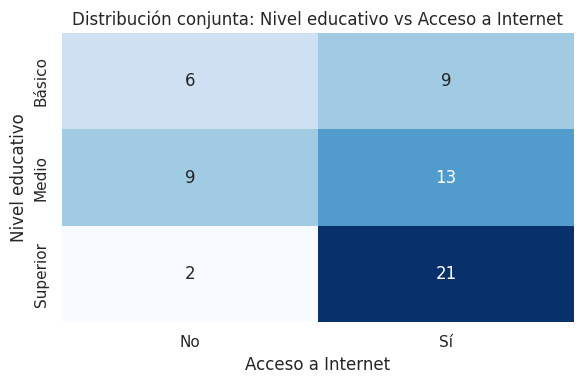

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

cedula = 585502
np.random.seed(cedula)

# Simulación de datos
n = 60
niveles = ["Básico", "Medio", "Superior"]
internet = ["Sí", "No"]

# Simulamos nivel educativo
nivel_educativo = np.random.choice(niveles, size=n, p=[0.3, 0.4, 0.3])

# Simulamos acceso a internet con cierta dependencia
acceso_internet = []
for nivel in nivel_educativo:
    if nivel == "Superior":
        acceso_internet.append(np.random.choice(internet, p=[0.85, 0.15]))
    elif nivel == "Medio":
        acceso_internet.append(np.random.choice(internet, p=[0.65, 0.35]))
    else:  # Básico
        acceso_internet.append(np.random.choice(internet, p=[0.45, 0.55]))

df = pd.DataFrame({
    "Nivel educativo": nivel_educativo,
    "Acceso a internet": acceso_internet
})

# 3. Tabla de contingencia
tabla = pd.crosstab(df["Nivel educativo"], df["Acceso a internet"])
print("Tabla de contingencia:")
print(tabla, "\n")

# 4. Prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)

print(f"Chi2 = {chi2:.3f}, p-valor = {p:.3f}")
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", pd.DataFrame(expected, index=tabla.index, columns=tabla.columns), "\n")

# 5. Visualización con mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(tabla, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Distribución conjunta: Nivel educativo vs Acceso a Internet")
plt.ylabel("Nivel educativo")
plt.xlabel("Acceso a Internet")
plt.tight_layout()
plt.show()


## Interpretación
H₀ (nula): No existe asociación entre nivel educativo y acceso a internet (son independientes).

H₁ (alternativa): Sí existe asociación entre nivel educativo y acceso a internet.

La prueba Chi-cuadrado arrojó un valor de Chi2 = 7.087 con un p-valor = 0.029.
Como el p-valor es menor que 0.05, se rechaza la hipótesis nula y concluimos que sí existe una relación estadísticamente significativa entre el nivel educativo y el acceso a internet.

En la tabla se observa que:

Las personas con educación superior tienen un acceso a internet mayor al esperado.

En cambio, en los niveles básico y medio hay más personas sin internet de lo esperado.

Esto sugiere que a mayor nivel educativo, mayor probabilidad de tener acceso a internet.